## **Ejercicio N° 4**
Utilizando el dataset `iris.csv` del **Ejercicio N° 1**:

In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [97]:
df = pd.read_csv('/content/iris.csv')
df.head()

,id,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa




1. Construya un gráfico que le permita visualizar la distribución de los valores observados del ancho de sépalo. A partir del gráfico realizado, ¿qué puede decir acerca de la simetría de la distribución?

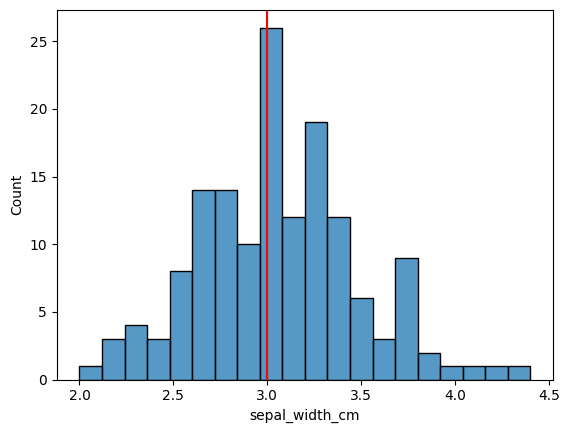

In [98]:
sns.histplot(df, x=df["sepal_width_cm"], bins=20)
plt.axvline(df["sepal_width_cm"].median(), color='red')

Presenta una simetría acampanada pero ligeramente sesgada hacia la derecha.



2. Realice un gráfico que permita comparar la distribución del largo del pétalo de las flores entre las distintas especies. Comente brevemente lo observado.



<Axes: xlabel='petal_length_cm', ylabel='Density'>

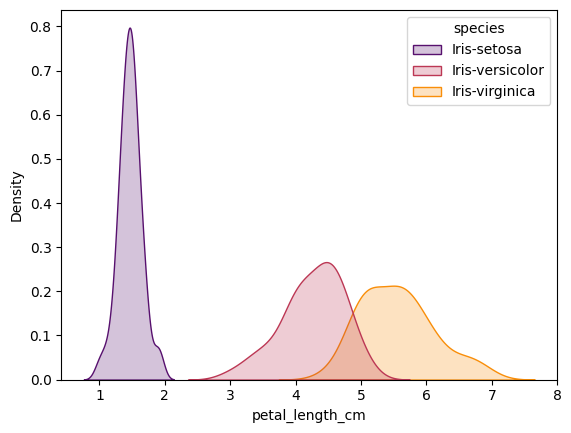

In [99]:

sns.kdeplot(df, x='petal_length_cm', hue='species', fill=True, palette='inferno')

3.

- Construya un gráfico que le permita analizar la relación general que existe entre las variables ancho y largo del pétalo. ¿Qué observa?

<Axes: xlabel='petal_length_cm', ylabel='petal_width_cm'>

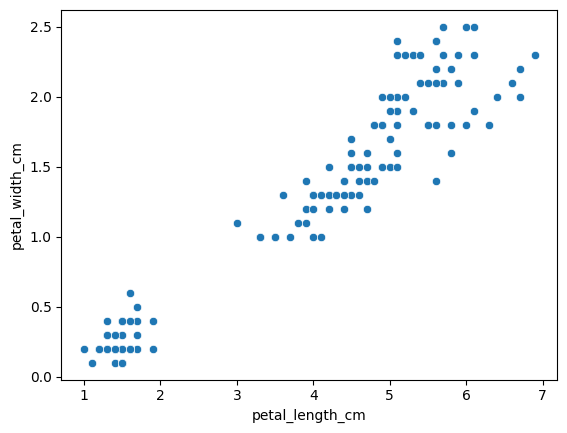

In [100]:
sns.scatterplot(df, x='petal_length_cm', y='petal_width_cm')


    
- Modifique el gráfico realizado en el ítem anterior de tal manera que le permita analizar si la relación general entre el ancho y el largo del pétalo se mantiene según la especie. Comente brevemente lo observado.


<Axes: xlabel='petal_length_cm', ylabel='petal_width_cm'>

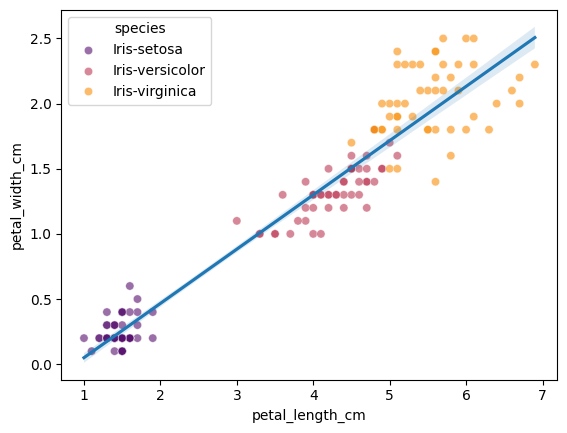

In [101]:
sns.scatterplot(df, x='petal_length_cm', y='petal_width_cm', hue="species", palette='inferno', alpha=0.6)
sns.regplot(df, x='petal_length_cm', y='petal_width_cm', scatter=False)

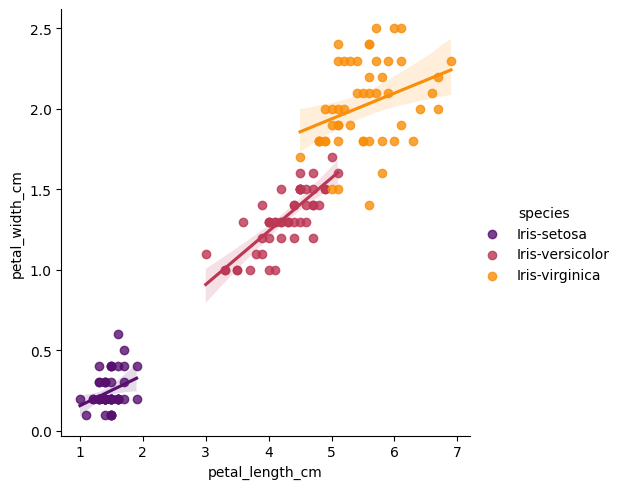

In [102]:
sns.lmplot(data=df, x='petal_length_cm', y='petal_width_cm', hue='species', palette='inferno')

    
4.

- Construya una matriz de gráficos que le permitan estudiar la asociación que existe entre todos los pares de variables cuantitativas del dataset. *Sugerencia*: utilice la función `pairplot()` de **Seaborn**.

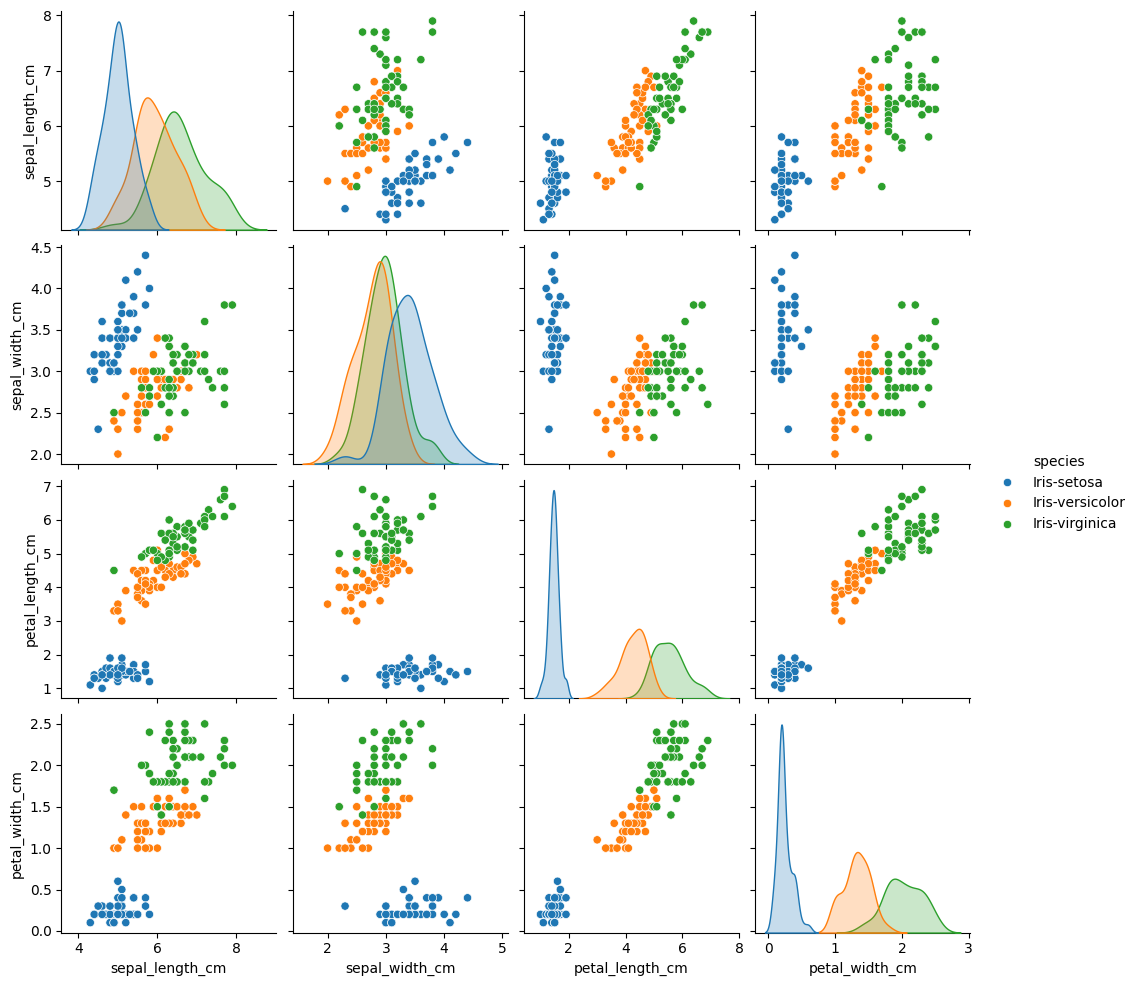

In [103]:
variables_correlacionables = ['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm','petal_width_cm']
df_correlacion = df[variables_correlacionables].copy()
sns.pairplot(df[variables_correlacionables + ['species']], diag_kind='kde', hue='species')



- Sobre las mismas variables cuantitativas del dataset, genere la matriz de correlación lineal de Pearson y represéntela gráficamente a través de un correlograma.  

<Axes: >

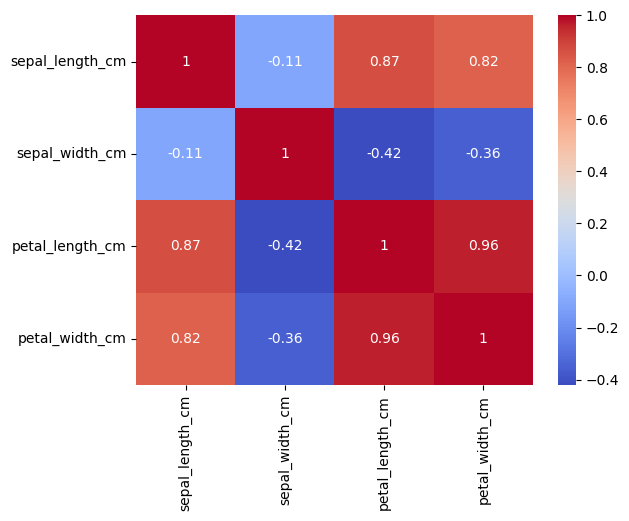

In [104]:
sns.heatmap(df[variables_correlacionables].corr(method='pearson'), annot=True, cmap='coolwarm')


    
- A partir de lo realizado en los ítems anteriores, caracterice el grado de asociación lineal entre los distintos pares de variables de interés, incluyendo fuerza y dirección, y analizando la correspondencia entre los valores calculados y lo observado gráficamente.

In [121]:
corr_df = (df[variables_correlacionables].corr()
           .where(np.triu(np.ones(df[variables_correlacionables].corr().shape), k=1).astype(bool))
           .stack()
           .reset_index()
           .rename(columns={'level_0': 'Variable_1', 'level_1': 'Variable_2', 0: 'Correlacion'})
           .assign(
               Par_Variables=lambda x: x['Variable_1'] + ' ↔ ' + x['Variable_2'],
               Direccion=lambda x: x['Correlacion'].apply(lambda r: 'Positiva' if r > 0 else 'Negativa'),
               Grado_Asociacion=lambda x: x['Correlacion'].abs().apply(
                   lambda r: 'Fuerte' if r >= 0.7 else 'Moderada' if r >= 0.3 else 'Débil'
               )
           )
           .sort_values('Correlacion', key=abs, ascending=False)
           .reset_index(drop=True)
           [['Par_Variables', 'Correlacion', 'Direccion', 'Grado_Asociacion']]
          )

print("=== TABLA DE CORRELACIONES DIRECTA ===")
print(corr_df.to_string(index=False))

# VERSIÓN MÁS LEGIBLE (2 líneas):
corr_matrix = df[variables_correlacionables].corr()
corr_table = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
              .stack().reset_index()
              .rename(columns={'level_0': 'Var1', 'level_1': 'Var2', 0: 'r'})
              .assign(
                  Par=lambda x: x['Var1'] + ' ↔ ' + x['Var2'],
                  Direccion=lambda x: np.where(x['r'] > 0, 'Positiva', 'Negativa'),
                  Fuerza=lambda x: pd.cut(x['r'].abs(),
                                         bins=[0, 0.3, 0.7, 1.0],
                                         labels=['Débil', 'Moderada', 'Fuerte'])
              )
              .sort_values('r', key=abs, ascending=False)
              [['Par', 'r', 'Direccion', 'Fuerza']]
             )

print("\n=== VERSIÓN CON pd.cut() ===")
print(corr_table.to_string(index=False))
print("="*50)
# PARA TUS DATOS ESPECÍFICOS DE IRIS (copia y pega esto):


corr_analysis = (df[variables_correlacionables].corr()
                 .where(np.triu(np.ones(df[variables_correlacionables].corr().shape), k=1).astype(bool))
                 .stack()
                 .reset_index()
                 .rename(columns={'level_0': 'Variable_1', 'level_1': 'Variable_2', 0: 'Correlacion'})
                 .assign(
                     Par_Variables=lambda x: x['Variable_1'] + ' ↔ ' + x['Variable_2'],
                     Direccion=lambda x: x['Correlacion'].apply(lambda r: 'Positiva' if r > 0 else 'Negativa'),
                     Grado_Asociacion=lambda x: x['Correlacion'].abs().apply(
                         lambda r: 'Fuerte' if r >= 0.7 else 'Moderada' if r >= 0.3 else 'Débil'
                     )
                 )
                 .sort_values('Correlacion', key=abs, ascending=False)
                 .reset_index(drop=True)
                 [['Par_Variables', 'Correlacion', 'Direccion', 'Grado_Asociacion']]
                )

print(corr_analysis)

=== TABLA DE CORRELACIONES DIRECTA ===
                    Par_Variables  Correlacion Direccion Grado_Asociacion
 petal_length_cm ↔ petal_width_cm     0.962757  Positiva           Fuerte
sepal_length_cm ↔ petal_length_cm     0.871754  Positiva           Fuerte
 sepal_length_cm ↔ petal_width_cm     0.817954  Positiva           Fuerte
 sepal_width_cm ↔ petal_length_cm    -0.420516  Negativa         Moderada
  sepal_width_cm ↔ petal_width_cm    -0.356544  Negativa         Moderada
 sepal_length_cm ↔ sepal_width_cm    -0.109369  Negativa            Débil

=== VERSIÓN CON pd.cut() ===
                              Par         r Direccion   Fuerza
 petal_length_cm ↔ petal_width_cm  0.962757  Positiva   Fuerte
sepal_length_cm ↔ petal_length_cm  0.871754  Positiva   Fuerte
 sepal_length_cm ↔ petal_width_cm  0.817954  Positiva   Fuerte
 sepal_width_cm ↔ petal_length_cm -0.420516  Negativa Moderada
  sepal_width_cm ↔ petal_width_cm -0.356544  Negativa Moderada
 sepal_length_cm ↔ sepal_width_cm -